In [1]:
import pandas as pd

import numpy as np

df1 = pd.read_csv('files_for_lab/csv_files/marketing_customer_analysis.csv')

In [ ]:
#1 

df1.shape





In [ ]:
2# Standarize header names
df1.columns

In [ ]:

df1 = df1.drop('Unnamed: 0',axis = 1)

In [ ]:
df1

In [2]:
cols = []
for col in df1.columns:
    cols.append(col.lower().replace(' ', '_'))
df1.columns = cols

In [ ]:
df1.columns

df1

In [3]:
df1 = df1.rename(columns={'employmentstatus':'employment_status'})

In [ ]:
df1 # Headers Standarized!!

In [ ]:
#3 and 4

# Check type of the hidde columns       

#Numerical Columns: 'customer_lifetime_value', 'income', 'montly_premium_auto',
       #'months_since_last_claim', 'months_since_policy_inception',
       #'number_of_open_complaints', 'number_of_policies',
        #'total_claim_amount'
        
#df1[['location_code','months_since_last_claim','months_since_policy_inception','marital_status','monthly_premium_auto']]

# Categorical columns: customer', 'state', , 'response', 'coverage','education', 'employment_status', 'gender', 'location_code', 'marital_status','policy_type','policy', 'renew_offer_type', 'sales_channel','vehicle_class', 'vehicle_size', 'vehicle_type'

In [4]:
#5 Replacing/imputing null values

df1.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employment_status                0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [ ]:
#5 Replacing/imputing null values

#5.1. Column "state"
missing_values_state = round(df1.isna().sum()/len(df1),2)*100
missing_values_state



In [ ]:
df1['state'] = df1['state'].fillna('Unknown')
df1['state'].value_counts(dropna=False)

In [ ]:
#5.2. Column "response"

In [ ]:
df1['response'].value_counts(dropna=False)/len(df1) # Replace missing values by "No"

In [ ]:
df1['response'] = df1['response'].fillna('No')
df1['response'].value_counts(dropna=False)/len(df1)

In [ ]:
#5.3. Column "months_since_last_claim"

df1['months_since_last_claim'].value_counts(dropna=False)/len(df1) 
# Nan values to be replace by the media

In [ ]:
import numpy as np
mean_months_last_claim = round(df1['months_since_last_claim'].mean(),2)
df1['months_since_last_claim'] = df1['months_since_last_claim'].fillna(mean_months_last_claim)

In [ ]:
# 5.4 Column "number_of_open_complaints"

df1['number_of_open_complaints'].value_counts(dropna=False)/len(df1) # to be replaced by the mode

In [ ]:
mode_number_of_open_complaints = df1['number_of_open_complaints'].mode()
df1['number_of_open_complaints'] = df1['number_of_open_complaints'].fillna(mode_number_of_open_complaints[0])

In [ ]:
# 5.5 Column "vehicle_class"

df1['vehicle_class'].value_counts(dropna=False)/len(df1) # Replace bye the most common class --> "Four-Door Car"

In [ ]:
df1['vehicle_class'] = df1['vehicle_class'].fillna('Four-Door Car')

In [ ]:
# 5.6 Column "vehicle_size" 

df1['vehicle_size'].value_counts(dropna=False)/len(df1) # Replace bye the most common size --> "Medsize"


In [ ]:
df1['vehicle_size'] = df1['vehicle_size'].fillna('Medsize')

In [ ]:
# 5.7 Column "vehicle_type " 

# Since half of this column has 50% of Nan values, it will be droped

df1 = df1.drop('vehicle_type', axis = 1)

# Confirmation of the inexistance of Nan values

In [ ]:
#6

df1.columns


In [ ]:
df1['effective_to_date']

In [ ]:
df1['datetime_format'] = pd.to_datetime(df1['effective_to_date'], errors='coerce')

In [ ]:
df1

In [ ]:
df1['datetime_format'][0].month


In [ ]:
dtime = df1.loc[(df1['datetime_format'] <= '2011-10-01')]

In [ ]:
dtime

In [ ]:
#LAB| CUSTOMER ANALYSIS ROUND 3

In [ ]:
#1 

df1.info()

In [ ]:
#2


df1.describe().T

In [ ]:
#3 Show a plot of the total number of responses.

import matplotlib.pyplot as plt
import seaborn as sns

#Create a new data frame with number of responses

number_of_total_responses = df1[['response']].value_counts()

#df_responses = [{'No': 7826, 'Yes': 1308}]

df_responses = [{'Yes': 1308}]

df2_responses = pd.DataFrame(df_responses)

df2_responses


# make data:

x = df2_responses.columns
y = [df2_responses['Yes'][0]]

# plot
fig, ax = plt.subplots()

ax.bar(x, y)
ax.set_ylabel('number of responses')
ax.set_ylim(0, 1500)
plt.show()

In [ ]:
4# Show a plot of the response rate by the sales channel.


In [ ]:
# response rate = number of responses at channel[i]/Total of responses
# x = channel
# y = response rate

# First we need to filter only the values with response = Yes and to define a new df

df2 = df1[['response','sales_channel']]

df2 = df2[df1['response']=='Yes']

df2['sales_channel'].value_counts()

df3 = pd.DataFrame([{'Agent':666, 'Branch': 294, 'Call Center': 192, 'Web':156}])

df3 = df3.T

df3 = df3.rename(columns={0:'number_of_responses'})

total_responses = 1308

df3['response_rate'] = round(df3['number_of_responses']*100/total_responses,2)

df3

fig, ax = plt.subplots(figsize=(7,3))
ax.set_title("Response_ratios_per_channel")
response_ratios = sns.barplot(data=df3, x="number_of_responses", y="response_rate")
response_ratios.set(xticklabels=["Web", "Call Center", "Branch","Agent" ])
plt.show()


In [ ]:
5# Show a plot of the response rate by the total claim amount.

df3 = df1[['response','total_claim_amount']]

#df3[df3['response']=='Yes']

#sns.displot(x=df3['response'], y=df3['total_claim_amount'])
#plt.show()

sns.boxplot(y="total_claim_amount", x='response', data = df3)
plt.show()

# Conclusion: It seems that the clients that have greater claim amounts tend to response much less.


In [ ]:
6# Show a plot of the response rate by income

In [ ]:


df4 = df1[['response','income']]

sns.boxplot(y="income", x='response', data = df4)
plt.show()




In [ ]:
#LAB| CUSTOMER ANALYSIS ROUND 4

In [5]:
#1

df1.info()
Categorical_columns_df = df1.select_dtypes([object])
Numerical_Columns_df = df1.select_dtypes([np.number])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer_lifetime_value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective_to_date              9134 non-null   object 
 7   employment_status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location_code                  9134 non-null   object 
 11  marital_status                 9134 non-null   object 
 12  monthly_premium_auto           9134 non-null   i

In [ ]:
Numerical_Columns_df

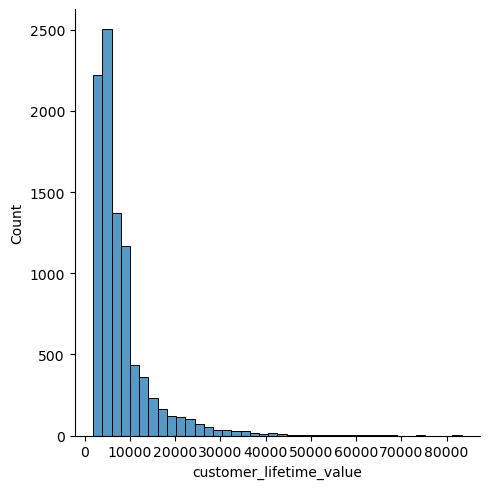

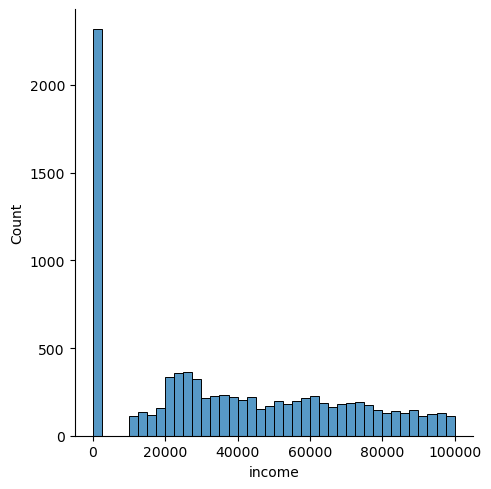

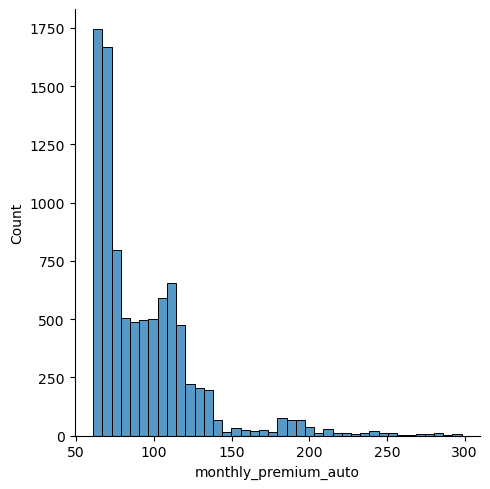

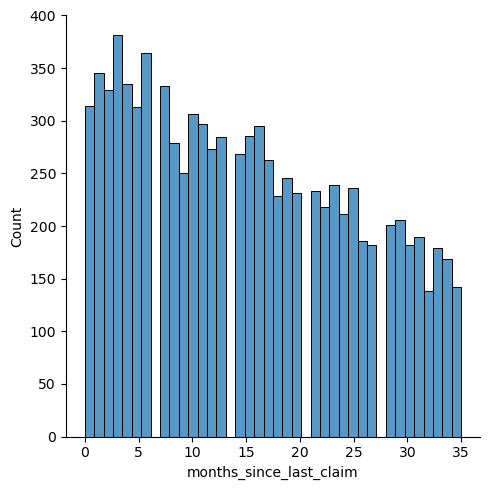

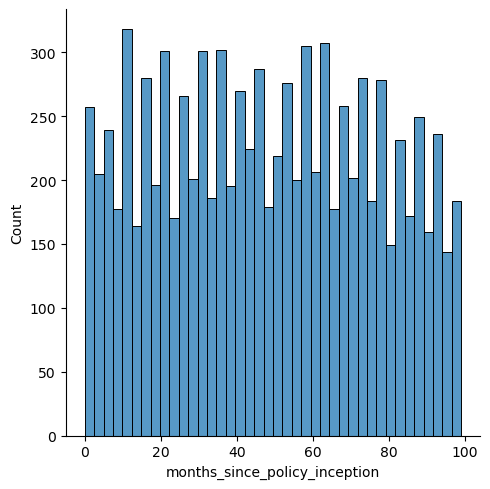

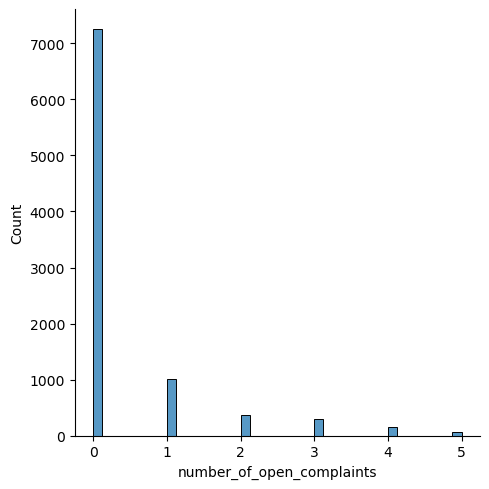

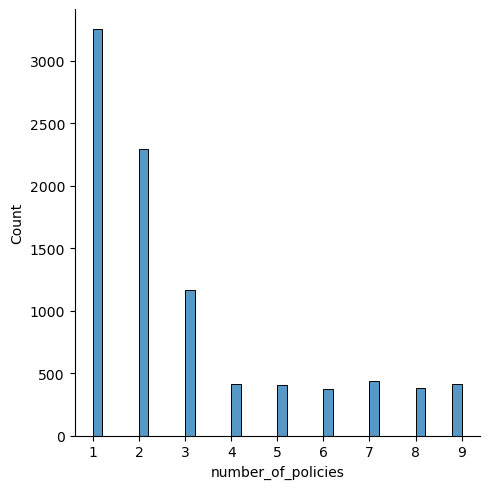

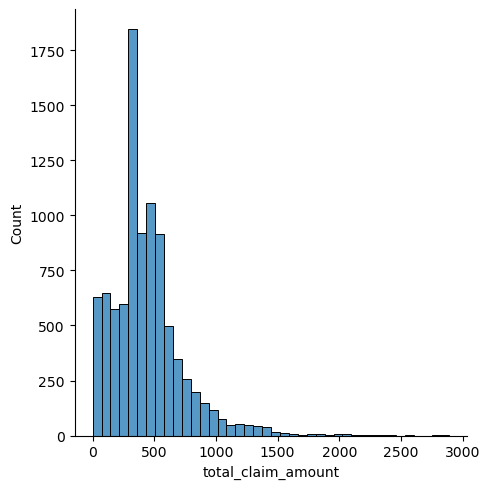

In [6]:
#2
#a) distribuiton plots with sns

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.displot(x = 'customer_lifetime_value', data = Numerical_Columns_df, bins=40)
sns.displot(x = 'income', data = Numerical_Columns_df, bins=40)
sns.displot(x = 'monthly_premium_auto', data = Numerical_Columns_df, bins=40)
sns.displot(x = 'months_since_last_claim', data = Numerical_Columns_df, bins=40)
sns.displot(x = 'months_since_policy_inception', data = Numerical_Columns_df, bins=40)
sns.displot(x = 'number_of_open_complaints', data = Numerical_Columns_df, bins=40)
sns.displot(x = 'number_of_policies', data = Numerical_Columns_df, bins=40)
sns.displot(x = 'total_claim_amount', data = Numerical_Columns_df, bins=40)
plt.show()

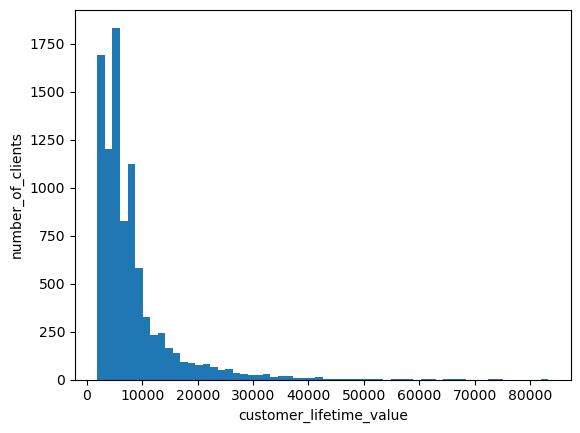

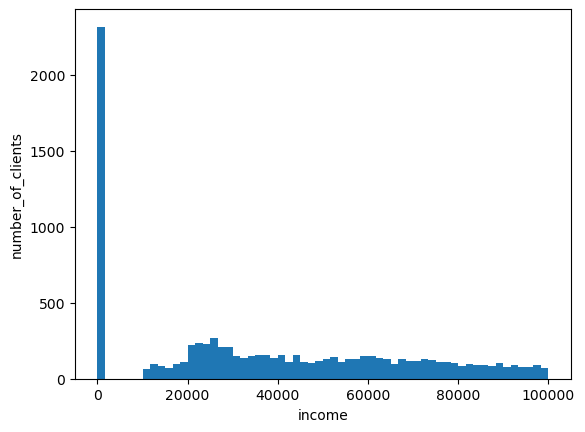

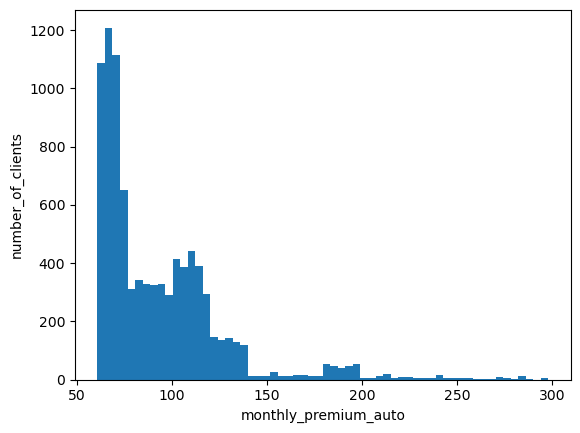

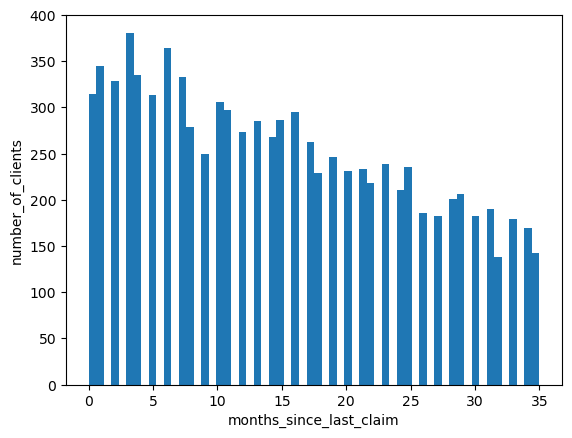

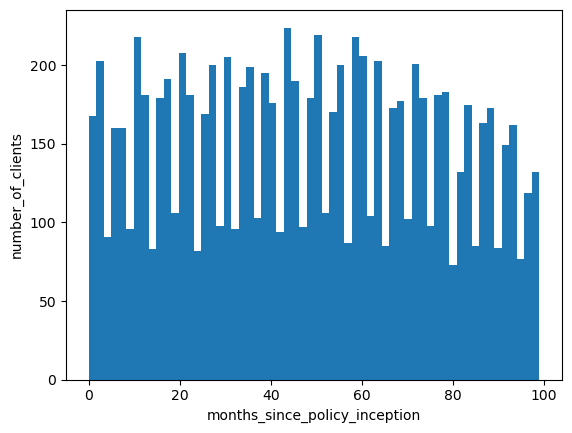

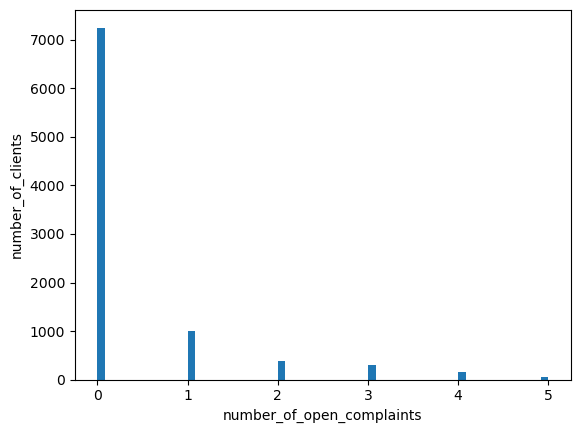

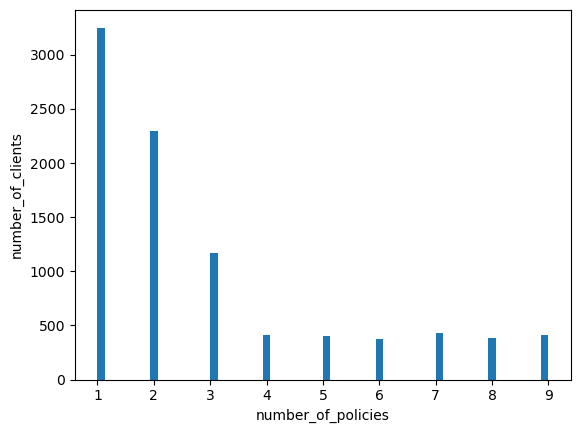

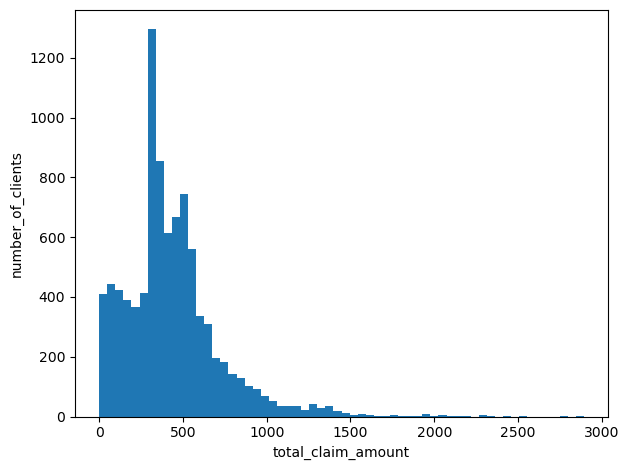

In [7]:
#b) Use Matplotlib to construct histograms
'''
fig, ax = plt.subplots(4,2)
ax[0,0].hist(df1['customer_lifetime_value'], bins=60)
ax[0,0].set_xlabel('Height')
ax[0,0].set_ylabel('Number of people')

ax[0,1].hist(df1['income'], bins=60)
ax[0,1].set_xlabel('Height')
ax[0,1].set_ylabel('Number of people')

ax[1,0].hist(df1['monthly_premium_auto'], bins=60)
ax[1,0].set_xlabel('Height')
ax[1,0].set_ylabel('Number of people')

ax[1,1].hist(df1['months_since_last_claim'], bins=60)
ax[1,1].set_xlabel('Height')
ax[1,1].set_ylabel('Number of people')

ax[2,0].hist(df1['months_since_policy_inception'], bins=60)
ax[2,0].set_xlabel('Height')
ax[2,0].set_ylabel('Number of people')

ax[2,1].hist(df1['number_of_open_complaints'], bins=60)
ax[2,1].set_xlabel('Height')
ax[2,1].set_ylabel('Number of people')

ax[3,0].hist(df1['number_of_policies'], bins=60)
ax[3,0].set_xlabel('Height')
ax[3,0].set_ylabel('Number of people')

ax[3,1].hist(df1['total_claim_amount'], bins=60)
ax[3,1].set_xlabel('Height')
ax[3,1].set_ylabel('Number of people')

plt.tight_layout()
plt.show()''' #We do not have a good vizualization with grid, so in this case seems to be better to plot individually.

%matplotlib inline

fig, ax = plt.subplots()
ax.hist(x = df1[['customer_lifetime_value']], bins=60)
ax.set_xlabel('customer_lifetime_value')
ax.set_ylabel('number_of_clients')

fig, ax = plt.subplots()
ax.hist(df1[['income']], bins=60)
ax.set_xlabel('income')
ax.set_ylabel('number_of_clients')

fig, ax = plt.subplots()
ax.hist(df1[['monthly_premium_auto']], bins=60)
ax.set_xlabel('monthly_premium_auto')
ax.set_ylabel('number_of_clients')

fig, ax = plt.subplots()
ax.hist(df1[['months_since_last_claim']], bins=60)
ax.set_xlabel('months_since_last_claim')
ax.set_ylabel('number_of_clients')

fig, ax = plt.subplots()
ax.hist(df1[['months_since_policy_inception']], bins=60)
ax.set_xlabel('months_since_policy_inception')
ax.set_ylabel('number_of_clients')

fig, ax = plt.subplots()
ax.hist(df1[['number_of_open_complaints']], bins=60)
ax.set_xlabel('number_of_open_complaints')
ax.set_ylabel('number_of_clients')

fig, ax = plt.subplots()
ax.hist(df1[['number_of_policies']], bins=60)
ax.set_xlabel('number_of_policies')
ax.set_ylabel('number_of_clients')

fig, ax = plt.subplots()
ax.hist(df1[['total_claim_amount']], bins=60)
ax.set_xlabel('total_claim_amount')
ax.set_ylabel('number_of_clients')

plt.tight_layout()
plt.show()

In [ ]:
# c) Do the distributions for different numerical variables look like a normal distribution?

# R: In general they don't look like a normal distributions, all of them are left skewed distribution except the distribution of "months_since_policy_inception" that seems to be close to a normal distribution.


In [8]:
# 3 For the numerical variables, check the multicollinearity between the features. Please note that we will use the column total_claim_amount later as the target variable.

features = Numerical_Columns_df.drop('total_claim_amount',axis=1)

corr_matrix = features.corr()

corr_matrix
#Very low correlations between columns


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer_lifetime_value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly_premium_auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months_since_last_claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months_since_policy_inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number_of_open_complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number_of_policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


In [ ]:
Numerical_Columns_df.columns

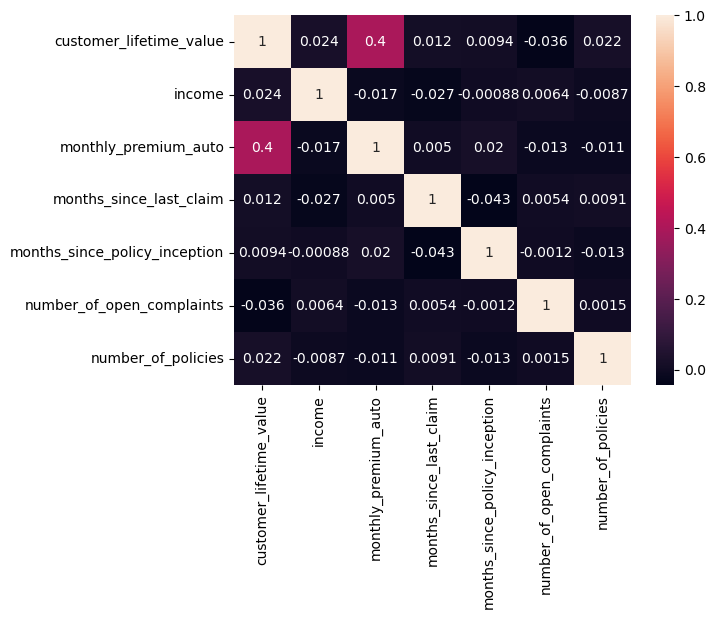

In [9]:
# 4 Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

# R: Not dropping any features because we have a much lower correlation. In that case the correlation matrix doesn's change.

#heatmap:

sns.heatmap(corr_matrix, annot=True)
plt.show()


In [ ]:
#LAB5: lab-customer-analysis-round-5

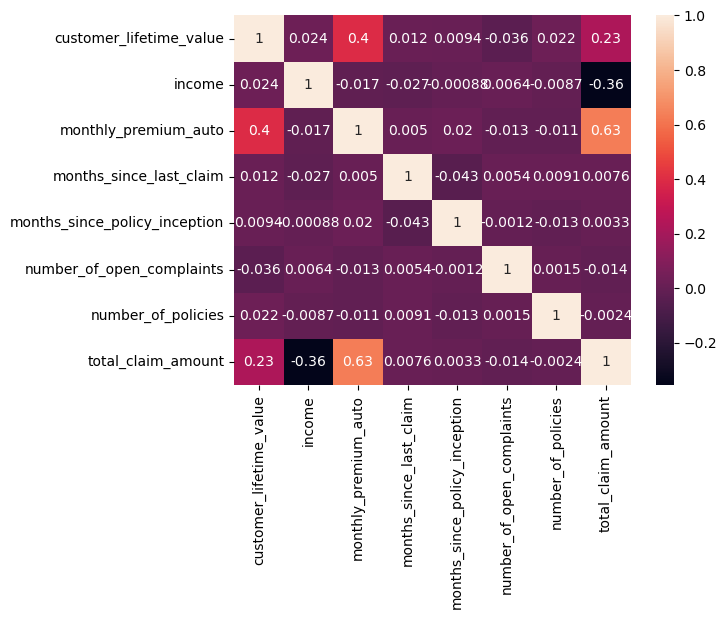

In [10]:
#1 X-y split

# Column that we want to predict = "total_claim_amount"
# Columns that we use to make predictions (4 columns_maximum --> recommended number) = 
        #=monthly premium auto (the column with greater correlation), income, customer_lifetime_value, number_of_open_complaints

from sklearn.linear_model import LinearRegression
lm = LinearRegression()

corr_matrix2 = Numerical_Columns_df.corr()

sns.heatmap(corr_matrix2, annot=True)
plt.show()

X = Numerical_Columns_df.drop(['total_claim_amount'], axis = 1) # dataframe from the previous lab without the target column "total_claim_amount"

y = Numerical_Columns_df['total_claim_amount']


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
Numerical_Columns_df_copy = Numerical_Columns_df

transformer = MinMaxScaler()
transformer.fit(X)
X_normalized = transformer.transform(X)
display(X_normalized)
df_normalized_1 = pd.DataFrame(X_normalized, columns=Numerical_Columns_df.drop(['total_claim_amount'], axis = 1).columns)
df_normalized_1.describe()

array([[0.01062925, 0.56284694, 0.03375527, ..., 0.05050505, 0.        ,
        0.        ],
       [0.06240565, 0.        , 0.13924051, ..., 0.42424242, 0.        ,
        0.875     ],
       [0.13495982, 0.48776267, 0.19831224, ..., 0.38383838, 0.        ,
        0.125     ],
       ...,
       [0.07695057, 0.        , 0.10126582, ..., 0.37373737, 0.6       ,
        0.125     ],
       [0.06909758, 0.2194517 , 0.14767932, ..., 0.03030303, 0.        ,
        0.25      ],
       [0.00876645, 0.        , 0.06751055, ..., 0.90909091, 0.        ,
        0.        ]])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,0.074999,0.376645,0.135946,0.431343,0.485501,0.076878,0.245771
std,0.084382,0.303857,0.145181,0.287807,0.281879,0.182077,0.298773
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.025744,0.000000,0.029536,0.171429,0.242424,0.000000,0.000000
50%,0.047677,0.338959,0.092827,0.400000,0.484848,0.000000,0.125000
75%,0.086754,0.623318,0.202532,0.657143,0.717172,0.000000,0.375000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#LAB-6 - lab-customer-analysis-round-6

#Linear Regression
#Apply linear regression.

lm = LinearRegression()
lm.fit(X,y)
print(lm.intercept_)
print(lm.coef_)



72.39096819184186
[-6.74723453e-04 -3.29341526e-03  5.34254540e+00 -1.45721018e-01
 -1.02321926e-01 -1.37160695e+00  2.48565252e-01]


In [14]:
#Train-test split.
from sklearn.model_selection import train_test_split

X = df_normalized_1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 7)
(1827, 7)
(7307,)
(1827,)


In [ ]:
X_train.head()

In [15]:
#Model Validation
#Description:
    #R2.
    #MSE.
    #RMSE.
    #MAE.


lm = LinearRegression()
lm.fit(X_train,y_train)
from sklearn.metrics import r2_score
y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)
r2_score(y_train, y_pred_train)

y_pred_test = lm.predict(X_test)
r2=r2_score(y_test, y_pred_test)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
mean_squared_error(y_test,y_pred_test)
np.sqrt(mean_squared_error(y_test,y_pred_test))
mean_absolute_error(y_test, y_pred_test)

print('R2 score is',round(r2,2))
print('MAE score is',round(mean_absolute_error(y_test, y_pred_test),2))
print('MSE score is', round(mean_squared_error(y_test,y_pred_test),0))
print('RMSE is',round(np.sqrt(mean_squared_error(y_test,y_pred_test)),0))


R2 score is 0.49
MAE score is 145.35
MSE score is 40222.0
RMSE is 201.0


In [19]:
#LAB-customer-analysis-round-7

#Improving the model

#Attempt 1.1 --> use a different method of scaling the numerical variables (StandardScaler)


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

X = Numerical_Columns_df.drop(['total_claim_amount'], axis = 1) # dataframe from the previous lab without the target column "total_claim_amount"

y = Numerical_Columns_df['total_claim_amount']


transformer2 = StandardScaler()
transformer2.fit(X)
X_normalized2 = transformer2.transform(X)
display(X_normalized2)
df_normalized_2 = pd.DataFrame(X_normalized2, columns=Numerical_Columns_df.drop(['total_claim_amount'], axis = 1).columns)


X = df_normalized_2

lm = LinearRegression()
lm.fit(X_train,y_train)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)
r2_score(y_train, y_pred_train)

y_pred_test = lm.predict(X_test)
r2=r2_score(y_test, y_pred_test)

mean_squared_error(y_test,y_pred_test)
np.sqrt(mean_squared_error(y_test,y_pred_test))
mean_absolute_error(y_test, y_pred_test)

print('R2 score is',round(r2,2))
print('MAE score is',round(mean_absolute_error(y_test, y_pred_test),2))
print('MSE score is', round(mean_squared_error(y_test,y_pred_test),0))
print('RMSE is',round(np.sqrt(mean_squared_error(y_test,y_pred_test)),0))

array([[-0.76287773,  0.61282744, -0.70392465, ..., -1.54328695,
        -0.42224956, -0.82264788],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.21733419,
        -0.42224956,  2.10615996],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.36068043,
        -0.42224956, -0.40424676],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ..., -0.39651699,
         2.87324529, -0.40424676],
       [-0.06993547, -0.51735647,  0.08082028, ..., -1.61496007,
        -0.42224956,  0.01415436],
       [-0.78495478, -1.23961684, -0.47140763, ...,  1.50282075,
        -0.42224956, -0.82264788]])

R2 score is 0.49
MAE score is 145.35
MSE score is 40222.0
RMSE is 201.0


In [20]:
#Attempt 2. --> use a different ratio of train test split with data standard scalled (Attempt 1.)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


y_pred_train = lm.predict(X_train)
r2_score(y_train, y_pred_train)
r2_score(y_train, y_pred_train)

y_pred_test = lm.predict(X_test)
r2=r2_score(y_test, y_pred_test)

mean_squared_error(y_test,y_pred_test)
np.sqrt(mean_squared_error(y_test,y_pred_test))
mean_absolute_error(y_test, y_pred_test)

print('R2 score is',round(r2,2))
print('MAE score is',round(mean_absolute_error(y_test, y_pred_test),2))
print('MSE score is', round(mean_squared_error(y_test,y_pred_test),0))
print('RMSE is',round(np.sqrt(mean_squared_error(y_test,y_pred_test)),0))

R2 score is 0.52
MAE score is 143.04
MSE score is 39335.0
RMSE is 198.0
